In [1]:
from matplotlib import pyplot as plt
from sympy import (init_printing, tanh, sqrt, exp, atan, symbols, erf, oo, pi, diff,
integrate, factor, Rational, expand, Integral, limit, log, simplify)
from sympy.utilities.lambdify import lambdify
from sympy.printing import latex
import sympy as sp
from IPython.display import display, Math, Latex
from numpy import arange
import numpy as np
init_printing()

In [2]:
x, t, a, b, sig, mu= symbols('x t a b sigma mu')
def splot(X, fun, label=None,  ls='-', marker=None):
    f = lambdify(x, fun, 'scipy')
    return plt.plot(X,f(X), ls=ls, marker=marker, label=label)

In [3]:
def mdisplay(latex):
    display(Math(latex))

In [4]:
X=arange(-5,5.1,0.1)

In [5]:
sigmoid1 = x/sqrt(1+x**2)
sigmoid1_prime = factor(diff(sigmoid1))
sigmoid1_prime_inv = 1/sigmoid1_prime

# Sigmoïdes

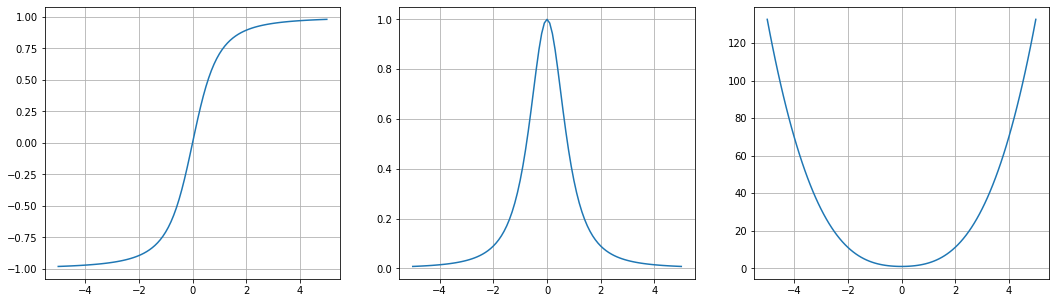

In [6]:
#hideme
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
splot(X, sigmoid1)
plt.grid()
plt.subplot(1,3,2)
splot(X, sigmoid1_prime)
plt.grid()
plt.subplot(1,3,3)
splot(X, sigmoid1_prime_inv)
plt.grid()
plt.show()

In [7]:
integrate(sigmoid1_prime, (x,-oo,oo))

# Arc tangente

In [8]:
fun1 = x**2+1
fun1

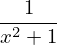

In [9]:
fun2 = 1/fun1
fun2

In [10]:
fun3 = integrate(fun2.subs(x,t), (t,0,x) )
fun3

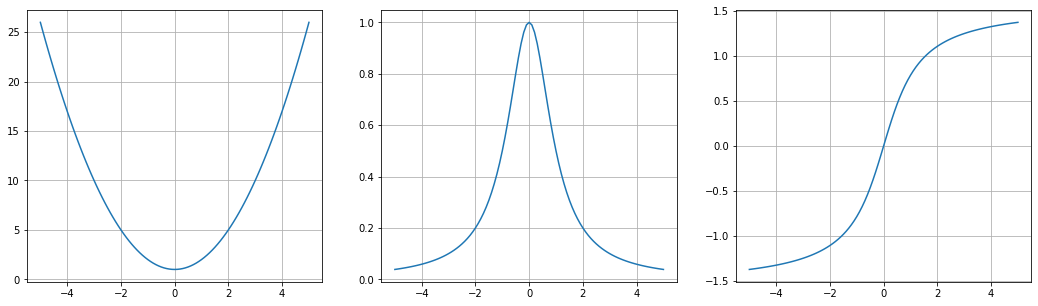

In [11]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
splot(X, fun1)
plt.grid()
plt.subplot(1,3,2)
splot(X, fun2)
plt.grid()
plt.subplot(1,3,3)
splot(X, fun3)
plt.grid()
plt.show()

In [12]:
mdisplay(latex(Integral(fun2, (x,-oo,oo))) + '=' + latex(integrate(fun2, (x,-oo,oo))))

<IPython.core.display.Math object>

# La fonction d'erreur

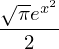

In [13]:
fun1= exp(x**2)
fun1 = fun1*sqrt(pi)/2
fun1

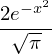

In [14]:
fun2 = 1/fun1
fun2

In [15]:
fun3 = integrate(fun2.subs(x,t), (t,0,x) )
fun3

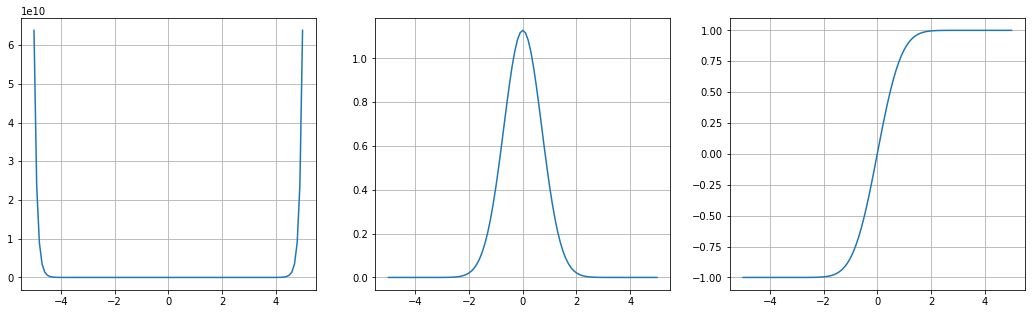

In [16]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
splot(X, fun1)
plt.grid()
plt.subplot(1,3,2)
splot(X, fun2)
plt.grid()
plt.subplot(1,3,3)
splot(X, fun3)
plt.grid()
plt.show()

# La fonction logistique

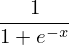

In [17]:
logistic = 1/(1+exp(-x))
logistic

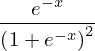

In [18]:
diff(logistic)

In [19]:
expand(1/diff(logistic))

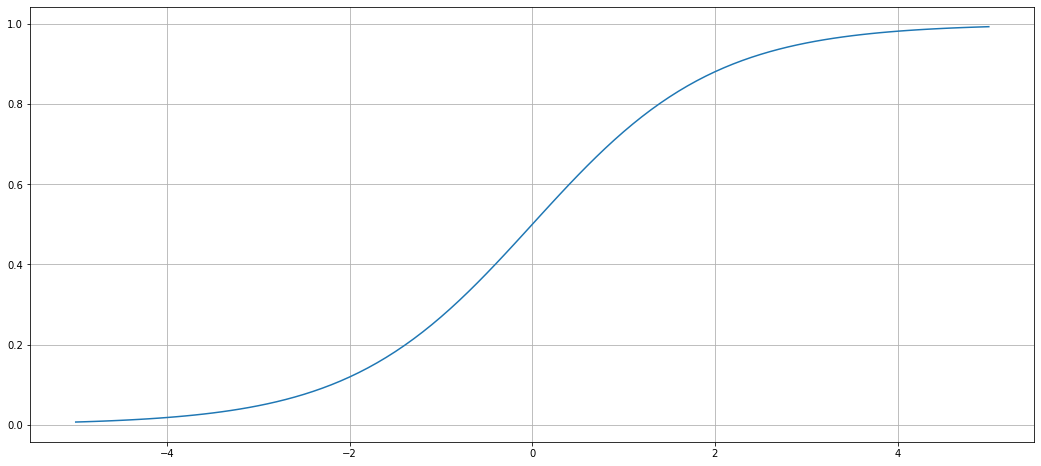

In [20]:
plt.figure(figsize=(18,8))
splot(X, logistic)
plt.grid()

# La fonction tangente hyperbolique

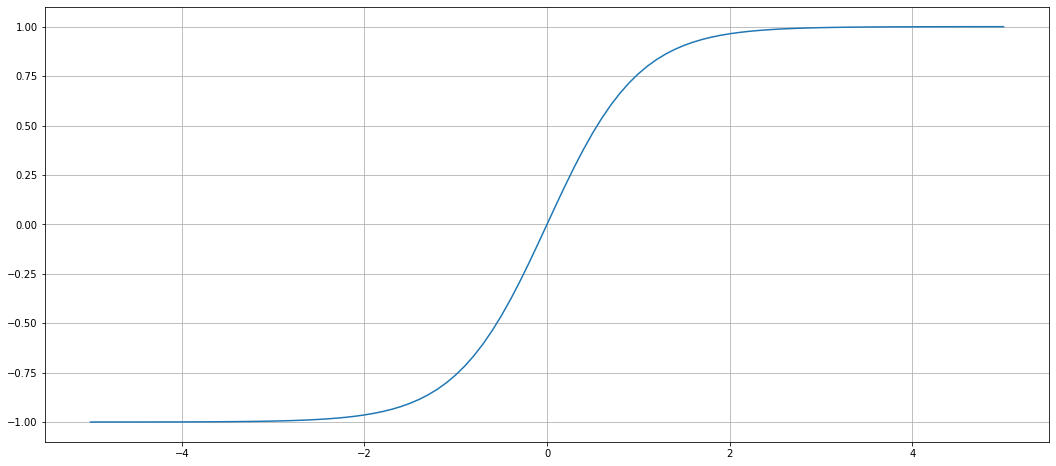

In [21]:
plt.figure(figsize=(18,8))
splot(X, tanh(x))
plt.grid()

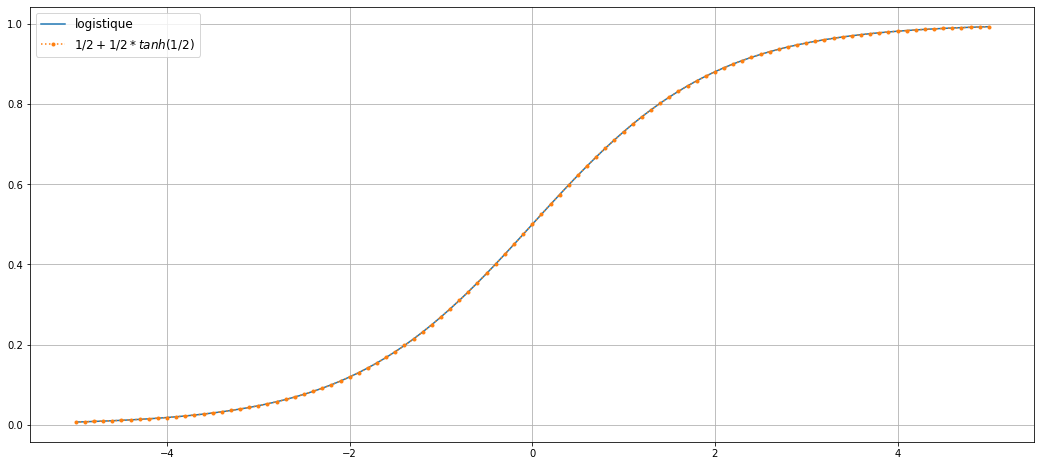

In [22]:
plt.figure(figsize=(18,8))
splot(X, logistic, label='logistique')
plot = splot(X, 1/2+1/2*tanh(x/2), ls=':', marker='.', label='$1/2+1/2*tanh(1/2)$')
plt.legend(prop={'size': 12})
plt.grid()

$$\frac{1}{1+e^{-x}} =\frac{1}{2}+\frac{1}{2}tanh(\frac{x}{2}) $$

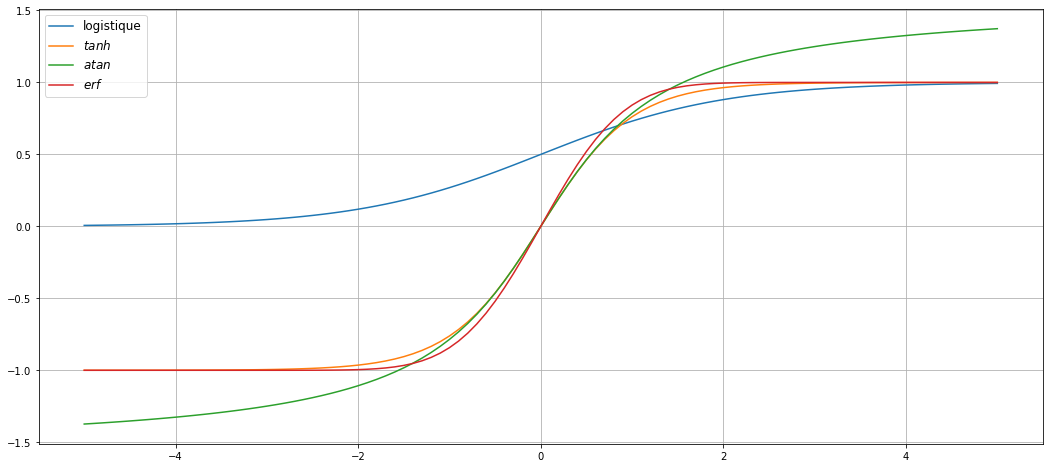

In [23]:
plt.figure(figsize=(18,8))
splot(X, logistic, label='logistique')
splot(X, tanh(x), label='$tanh$')
splot(X, atan(x), label='$atan$')
splot(X, erf(x), label='$erf$')
plt.legend(prop={'size': 12})
plt.grid()

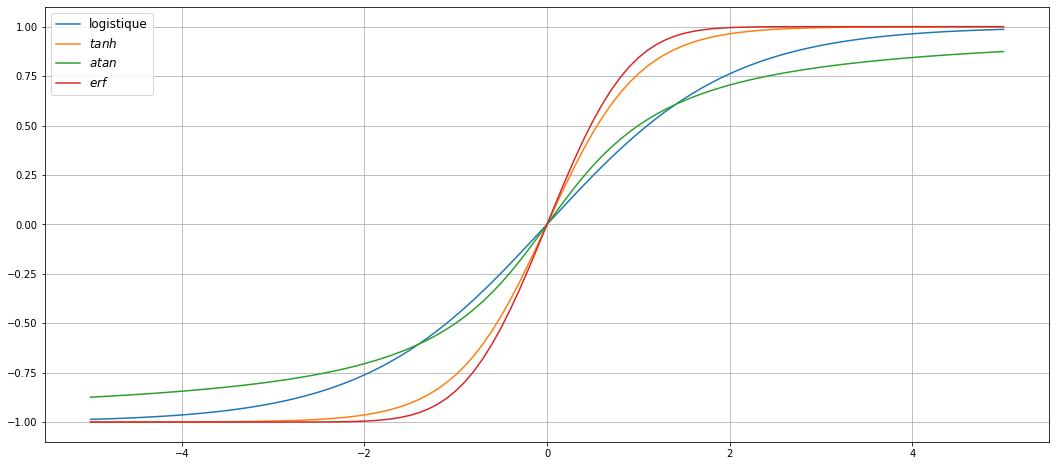

In [24]:
plt.figure(figsize=(18,8))
splot(X, logistic*2-1, label='logistique')
splot(X, tanh(x), label='$tanh$')
splot(X, atan(x)/pi*2, label='$atan$')
splot(X, erf(x), label='$erf$')
plt.legend(prop={'size': 12})
plt.grid()

# La fonction logistique generalisée

In [25]:
def generalized_logistic(A=0,K=1,B=1,nu=1,Q=1,C=1):
    return lambda x : A + (K-A)/np.power(C+Q*np.exp(-B*x),1/nu)

$$ Y(x)=A + \frac{K-A}{(C+Qe^{-Bx})^{1/\nu}} $$

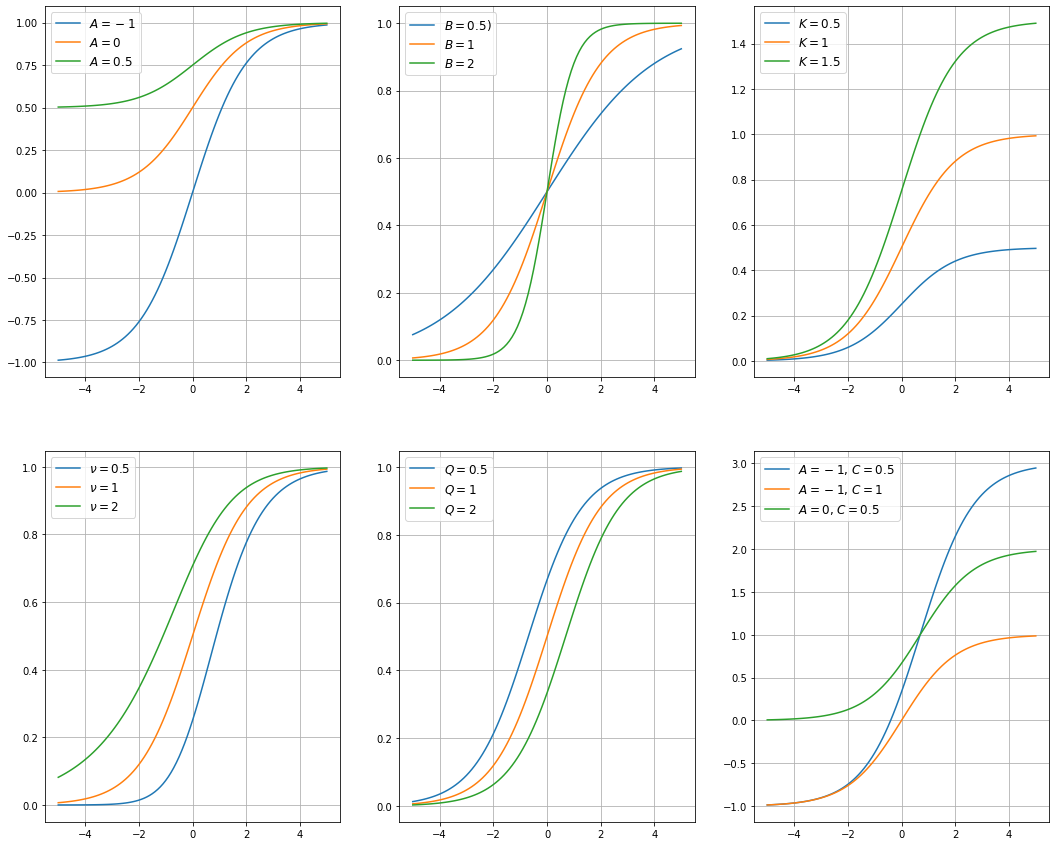

In [26]:
plt.figure(figsize=(18,15))
plt.subplot(2,3,1)
plt.plot(X, generalized_logistic(A=-1)(X), label=r'$A=-1$')
plt.plot(X, generalized_logistic(A=0)(X), label=r'$A=0$')
plt.plot(X, generalized_logistic(A=0.5)(X), label=r'$A=0.5$')
plt.legend(prop={'size': 12})
plt.grid()
plt.subplot(2,3,2)
plt.plot(X, generalized_logistic(B=0.5)(X), label=r'$B=0.5$)')
plt.plot(X, generalized_logistic(B=1)(X), label=r'$B=1$')
plt.plot(X, generalized_logistic(B=2)(X), label=r'$B=2$')
plt.legend(prop={'size': 12})
plt.grid()
plt.subplot(2,3,3)
plt.plot(X, generalized_logistic(K=0.5)(X), label=r'$K=0.5$')
plt.plot(X, generalized_logistic(K=1)(X), label=r'$K=1$')
plt.plot(X, generalized_logistic(K=1.5)(X), label=r'$K=1.5$')
plt.legend(prop={'size': 12})
plt.grid()
plt.subplot(2,3,4)
plt.plot(X, generalized_logistic(nu=0.5)(X), label=r'$\nu=0.5$')
plt.plot(X, generalized_logistic(nu=1)(X), label=r'$\nu=1$')
plt.plot(X, generalized_logistic(nu=2)(X), label=r'$\nu=2$')
plt.legend(prop={'size': 12})
plt.grid()
plt.subplot(2,3,5)
plt.plot(X, generalized_logistic(Q=0.5)(X), label=r'$Q=0.5$')
plt.plot(X, generalized_logistic(Q=1)(X), label=r'$Q=1$')
plt.plot(X, generalized_logistic(Q=2)(X), label=r'$Q=2$')
plt.legend(prop={'size': 12})
plt.grid()
plt.subplot(2,3,6)
plt.plot(X, generalized_logistic(A=-1,C=0.5)(X), label=r'$A=-1$, $C=0.5$')
plt.plot(X, generalized_logistic(A=-1,C=1)(X), label=r'$A=-1$, $C=1$')
plt.plot(X, generalized_logistic(C=0.5)(X), label=r'$A=0$, $C=0.5$')
plt.legend(prop={'size': 12})
plt.grid()


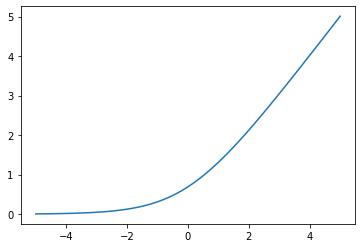

In [27]:
splot(X,integrate(logistic))

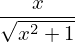

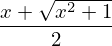

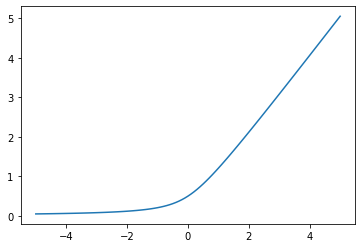

In [28]:
test = (x**2+1)**Rational(3,2)
test = x/sqrt(x**2+1)
display(test)
display(factor(integrate((test+1)/2)))
splot(X,integrate(test+1)/2)

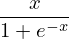

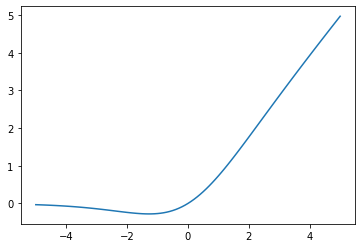

In [29]:
display(logistic*x)
splot(X,logistic*x)